### Importación de librerías

In [1]:
import serial 
import serial.tools.list_ports
import roboticstoolbox as rtb
import spatialmath as sm
import numpy as np

#### Identicación de puertos, configuración del serial.

In [2]:
ports = serial.tools.list_ports.comports()

for port, desc, hwid in sorted(ports):
        print("{}: {} [{}]".format(port, desc, hwid))

COM1: Puerto de comunicaciones (COM1) [ACPI\PNP0501\1]


In [6]:
#sPort = serial.Serial()
#sPort.baudrate = 9600
#sPort.port = 'COM5' # 'COM4'
arduino = serial.Serial('COM5',9600)
#try :
 #   sPort.open()
  #  sPort.is_open
#finally:
 #   sPort.close()

#### Instancia del manipulador 

In [2]:
thor = rtb.models.DH.ThorArm()
thor1 = rtb.models.DH.Thor()
thor1

DHRobot: Thor (by Open_Source), 4 joints (RRRR), dynamics, geometry, standard DH parameters
┌───────────┬─────┬──────┬────────┬─────────┬────────┐
│    θⱼ     │ dⱼ  │  aⱼ  │   ⍺ⱼ   │   q⁻    │   q⁺   │
├───────────┼─────┼──────┼────────┼─────────┼────────┤
│  q1       │ 0.2 │    0 │  90.0° │ -180.0° │ 180.0° │
│  q2 + 90° │   0 │ 0.16 │   0.0° │  -90.0° │  90.0° │
│  q3 - 90° │   0 │    0 │ -90.0° │  -90.0° │  90.0° │
│  q4       │ 0.1 │    0 │  90.0° │ -100.0° │ 100.0° │
└───────────┴─────┴──────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬──────┬──────┬─────┐
│ name │ q0  │ q1   │ q2   │ q3  │
├──────┼─────┼──────┼──────┼─────┤
│   qr │  0° │  0°  │  0°  │  0° │
│   qz │  0° │ -90° │  90° │  0° │
│   qs │  0° │  0°  │ -90° │  0° │
└──────┴─────┴──────┴──────┴─────┘

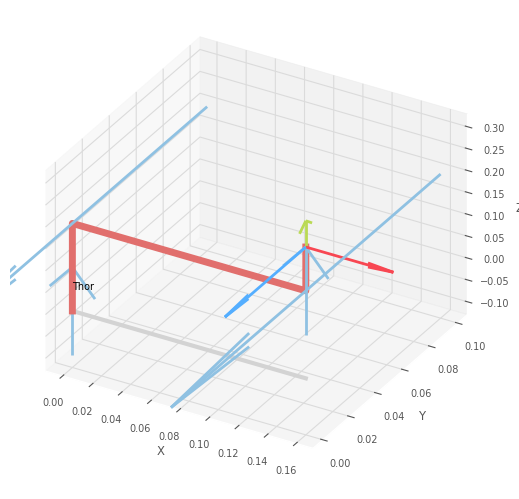

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [3]:
# Thor en configuración cero con todas las variables articulares en 0
thor1.plot(thor1.qz)

[0. 0. 0. 0.]


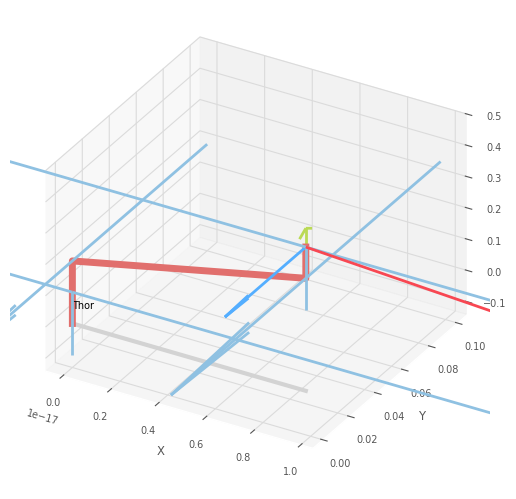

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [4]:
# Thor en posición vertical
print(thor1.qr)
thor1.plot(thor1.qr)

#### Cinemática directa e inversa

In [5]:
qx = np.deg2rad([0, 0, 0, 0, 0, 0])
qy = np.deg2rad([70, 35, 10, 0, 0, 0])

In [6]:
Pose1 = thor.fkine(qx)
Pose1

   1         0         0         0         
   0         1         0         0         
   0         0         1         0.46      
   0         0         0         1         


In [7]:
Pose2 = thor.fkine(qy)
Pose2

   0.2418   -0.9397   -0.2418   -0.05557   
   0.6645    0.342    -0.6645   -0.1527    
   0.7071    0         0.7071    0.4018    
   0         0         0         1         


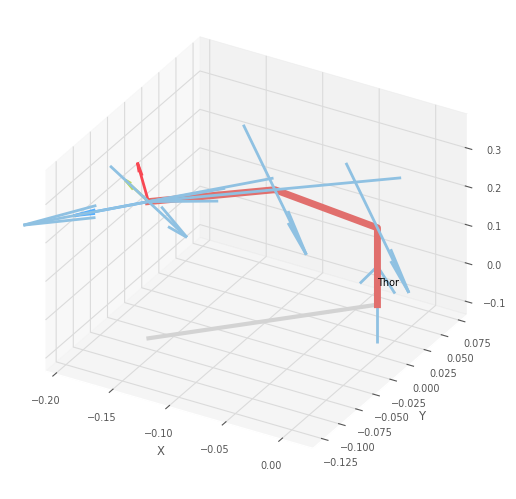

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [11]:
thor.plot(qx)

In [27]:
Pose0 = sm.SE3.Tx(0.0)*sm.SE3.Ty(0.0)*sm.SE3.Tz(0.0)
sol0 = thor.ikine_LM(Pose0)
#sol1 = thor.ikine_LM(Pose1)
#sol1 = thor.qr
#sol1
qx = np.rad2deg((sol0.q))
qzx= np.rad2deg(thor.qr)
print(Pose0)

   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         



In [32]:
thor.qr

array([0., 0., 0., 0., 0., 0.])

In [26]:
msg = ""
for i, k in enumerate(qx):
    deg = round(k)
    if (i == 0):
        msg = msg+str(deg)
    else:
        if i<4:
            msg = msg+','+str(deg)
        else:
            break
arduino.write(msg.encode())
msg

'-16,150,82,0'

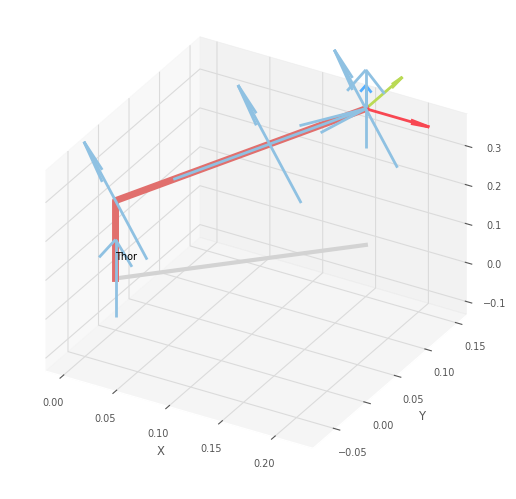

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [20]:
thor.plot(sol0.q)

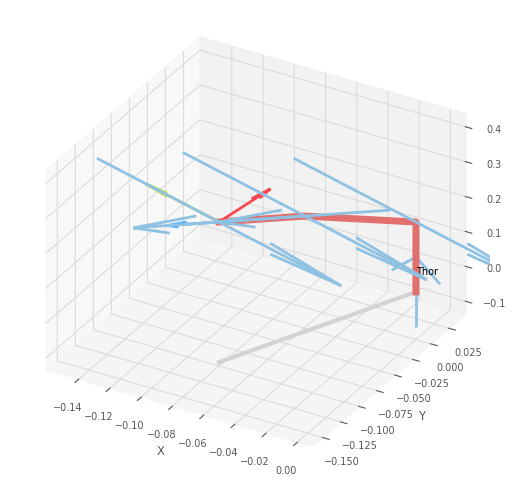

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [19]:
thor.plot(qy)

In [21]:
sol2 = thor.ikine_LM(Pose2)
np.rad2deg(sol2.q)

array([-1.10000000e+02, -3.50000000e+01, -1.00000000e+01, -1.14286343e+02,
        3.32388320e-09, -6.57136573e+01])

In [29]:
t = np.arange(0, 2, 0.02);
traj = rtb.tools.mtraj(rtb.tools.trajectory.quintic, sol1.q, sol2.q, t);

In [30]:
traj.q.shape

(100, 6)

In [38]:
traj.q

array([[ 7.85398219e-01,  5.23598703e-01,  8.72664701e-01,
         5.23598418e-01,  1.74532257e-01,  4.70864644e-07],
       [ 7.85370759e-01,  5.23587187e-01,  8.72654072e-01,
         5.23572856e-01,  1.74530485e-01, -1.11710394e-05],
       [ 7.85181878e-01,  5.23507979e-01,  8.72580956e-01,
         5.23397031e-01,  1.74518299e-01, -9.12489742e-05],
       [ 7.84679243e-01,  5.23297197e-01,  8.72386388e-01,
         5.22929138e-01,  1.74485871e-01, -3.04345712e-04],
       [ 7.83720250e-01,  5.22895039e-01,  8.72015165e-01,
         5.22036432e-01,  1.74424001e-01, -7.10919413e-04],
       [ 7.82171821e-01,  5.22245697e-01,  8.71415773e-01,
         5.20595030e-01,  1.74324103e-01, -1.36739045e-03],
       [ 7.79910193e-01,  5.21297273e-01,  8.70540304e-01,
         5.18489728e-01,  1.74178192e-01, -2.32622827e-03],
       [ 7.76820722e-01,  5.20001688e-01,  8.69344380e-01,
         5.15613803e-01,  1.73978872e-01, -3.63603818e-03],
       [ 7.72797670e-01,  5.18314602e-01,  8.677

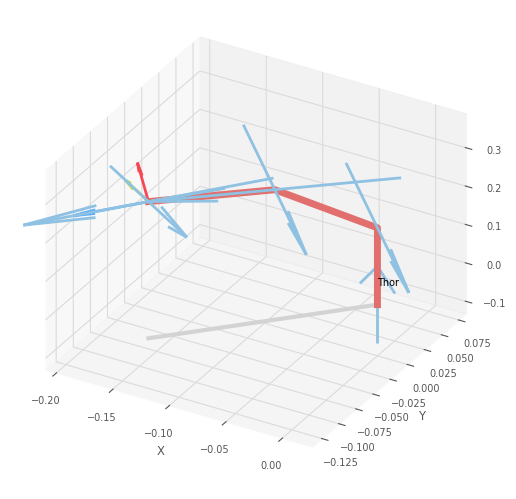

PyPlot3D backend, t = 4.99999999999999, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [37]:
thor.plot(traj.q)

In [36]:
rtb.tools.trajectory.qplot(t, traj.q);

AttributeError: module 'roboticstoolbox.tools.trajectory' has no attribute 'qplot'

In [34]:
T = thor.fkine(traj.q);
T

0:
  -0.3644   -0.6738   -0.6429   -0.1262    
   0.332     0.551    -0.7656   -0.1262    
   0.8701   -0.4924    0.02291   0.3559    
   0         0         0         1         
1:
  -0.3643   -0.6738   -0.6429   -0.1262    
   0.332     0.551    -0.7656   -0.1262    
   0.8701   -0.4924    0.02293   0.3559    
   0         0         0         1         
2:
  -0.364    -0.6738   -0.643    -0.1262    
   0.332     0.5512   -0.7655   -0.1262    
   0.8702   -0.4921    0.02308   0.356     
   0         0         0         1         
3:
  -0.3631   -0.6738   -0.6435   -0.1263    
   0.3321    0.5517   -0.7651   -0.1261    
   0.8706   -0.4915    0.02347   0.356     
   0         0         0         1         
4:
  -0.3614   -0.674    -0.6443   -0.1263    
   0.3323    0.5526   -0.7644   -0.1259    
   0.8712   -0.4903    0.02422   0.3561    
   0         0         0         1         
5:
  -0.3587   -0.6741   -0.6457   -0.1264    
   0.3325    0.5541   -0.7632   -0.1256    
   0.8722   -0

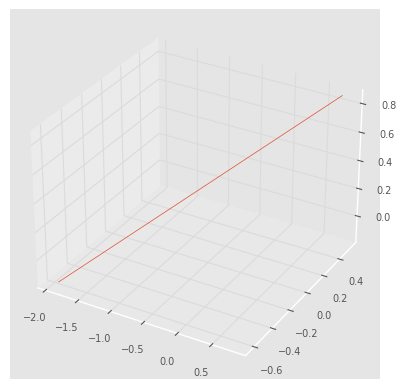

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(); ax = fig.add_subplot(111, projection="3d");
plt.plot(traj.q[:,0], traj.q[:,1], traj.q[:,2]);

In [11]:
sPort = serial.Serial()
sPort.baudrate = 9600
sPort.port = '/dev/ttyACM0'
sPort.open()
sPort.is_open

SerialException: [Errno 2] could not open port /dev/ttyACM0: [Errno 2] No such file or directory: '/dev/ttyACM0'

In [20]:
sPort.close()

In [22]:
sPort.is_open

False

In [27]:
sPort.write("-360, 500".encode())

9

In [48]:
sPort.write("0, 100".encode())

6